# Counting bright objects in images
A common use case for image processing in the biology context is counting blobs of high signal intensity surrounded by a low intensity background. Thresholding is the method of choice in this scenario. We demonstrate it with Otsu's thresholding method (Otsu et al., IEEE Transactions on Systems, Man, and Cybernetics, Vol. 9 (1), 1979)

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")

<Apple M1 Max on Platform: Apple (2 refs)>

Loaded image size: (254, 256)


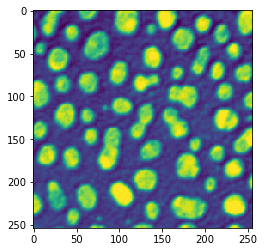

In [2]:
# load data
image = imread('../../data/blobs.tif')
print("Loaded image size: " + str(image.shape))

cle.imshow(image)

We just setup a simple image processing workflow that leads to a label image.

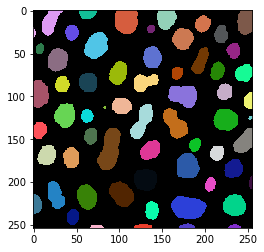

In [3]:
# process the image
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
binary = cle.threshold_otsu(blurred)
labeled = cle.connected_components_labeling_box(binary)

# show result
cle.imshow(labeled, labels=True)

The maximum intensity in a label image corresponds to the number of objects.

In [4]:
num_labels = cle.maximum_of_all_pixels(labeled)
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 62.0


## Exercise
Remove the labels that touch the image border and count the objects again.